In [14]:
print 'Hello'
%matplotlib inline

Hello


## ML tutorials

From https://www.toptal.com/machine-learning/machine-learning-theory-an-introductory-primer


“A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.” -- Tom Mitchell, Carnegie Mellon University 


Supervised machine learning: The program is “trained” on a pre-defined set of “training examples”, which then facilitate its ability to reach an accurate conclusion when given new data.
    
    
Unsupervised machine learning: The program is given a bunch of data and must find patterns and relationships therein.


Supervised learning tries to find h(x). 

x may consit of mutiple data points.

For this example, lets say

\begin{equation}h(x) = \theta_0 + \theta_1 x\end{equation}

Where $\theta_0$ and $\theta_1$ are constant 

we want to be ale to find the best values for $\theta_0$ and $\theta_1$

To do this we will use training exersises 


<function matplotlib.pyplot.scatter>

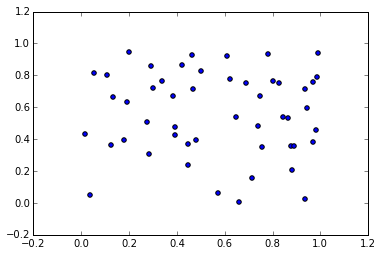

In [22]:
import pylab
import random

import matplotlib.pyplot as plt
sampleSize = 50


random.seed()

XVal = []
YVal = []
for i in range(sampleSize):
    newValue = random.random()
    XVal.append(newValue)
    
    
for i in range(sampleSize):
    newValue = random.random()
    YVal.append(newValue)    



plt.scatter(XVal, YVal)
plt.scatter





Random data code adapted from http://users.ecs.soton.ac.uk/jn2/teaching/pythonLecture.html

Kept in for future ref.

<function matplotlib.pyplot.scatter>

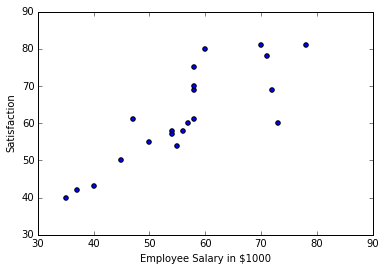

In [31]:
EmpSatRat = [40,42,43,50,55,54,58,60,61,58,57,61,69,70,75,80,81,78,69,60,81]
EmpSatTho = [35,37,40,45,50,55,56,57,58,54,54,47,58,58,58,60,70,71,72,73,78]

plt.scatter(EmpSatTho, EmpSatRat)
plt.xlabel('Employee Salary in $1000')
plt.ylabel('Satisfaction')
plt.scatter




<function matplotlib.pyplot.scatter>

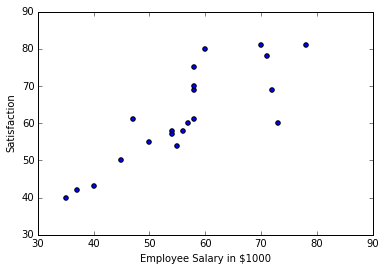

In [44]:
import numpy as np  
import matplotlib.pyplot as plt
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y)  
    plt.show()
    


EmpSatRat = [40,42,43,50,55,54,58,60,61,58,57,61,69,70,75,80,81,78,69,60,81]
EmpSatTho = [35,37,40,45,50,55,56,57,58,54,54,47,58,58,58,60,70,71,72,73,78]

plt.scatter(EmpSatTho, EmpSatRat)
plt.xlabel('Employee Salary in $1000')
plt.ylabel('Satisfaction')
plt.scatter
   

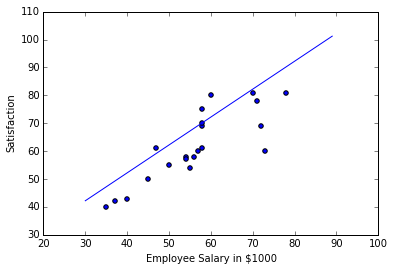

In [45]:
EmpSatRat = [40,42,43,50,55,54,58,60,61,58,57,61,69,70,75,80,81,78,69,60,81]
EmpSatTho = [35,37,40,45,50,55,56,57,58,54,54,47,58,58,58,60,70,71,72,73,78]

plt.scatter(EmpSatTho, EmpSatRat)
plt.xlabel('Employee Salary in $1000')
plt.ylabel('Satisfaction')
plt.scatter
graph('12+0.2 + x ', range(30,90))


Regression is having issues with arrays, switich on CSV, EmpRatSat.csv

R-squared 0.6943444634


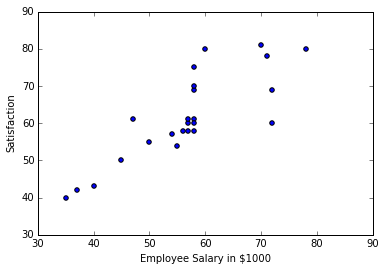

In [44]:
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
from sklearn.cross_validation import train_test_split


df = pd.read_csv('EmpRatSat.csv' , sep = ',')
y = df['y']
X = df[list(df.columns)[:-1]]

X_train, X_test, y_train, y_test = train_test_split(X,y)

plt.scatter(X,y)

plt.xlabel('Employee Salary in $1000')
plt.ylabel('Satisfaction')


regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)
print 'R-squared', regressor.score(X_test,y_test)








76% of variance in the test set is explained by the model

In [79]:
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
from sklearn.cross_validation import cross_val_score


df = pd.read_csv('EmpRatSat.csv' , sep = ',')
X = df[list(df.columns)[:-1]]
y = df['y']



regressor = LinearRegression()
scores = cross_val_score(regressor, X,y,cv=5 )
print scores.mean(), scores

-3.53899220994 [-0.41939775 -2.58828988 -7.04261921 -6.13931123 -1.50534298]


In [25]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
from sklearn.cross_validation import cross_val_score


df = pd.read_csv('EmpRatSat.csv' , sep = ',')
X = df[list(df.columns)[:-1]]
y = df['y']



model = LinearRegression()
model.fit(X,y)






print 'A employee earning $70k  should have a rating of : %.2f' % model.predict([70])[0]




A employee earning $70k  should have a rating of : 73.47


C:\Python27\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


R-squared 0.650482179553


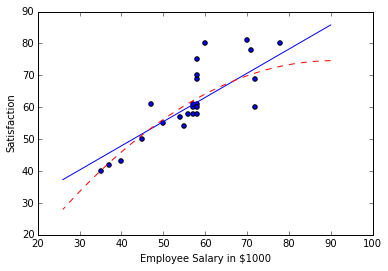

In [46]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv('EmpRatSat.csv' , sep = ',')
X = df[list(df.columns)[:-1]]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y)


regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)

xx = np.linspace(90, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.scatter(X,y)
plt.plot(xx, yy)

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)


xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',linestyle='--')

plt.xlabel('Employee Salary in $1000')
plt.ylabel('Satisfaction')

print 'R-squared', regressor.score(X_test,y_test)





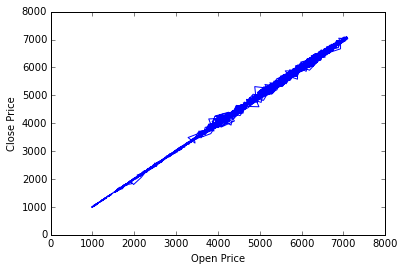

In [64]:

from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv('MarketData.csv' , sep = ',')
X = df['Open']
y = df['Close']

plt.xlabel('Open Price')
plt.ylabel('Close Price')



plt.plot(X,y)

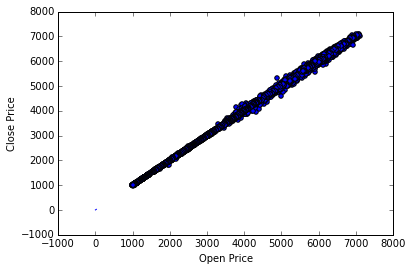

In [77]:
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import cross_val_score



df = pd.read_csv('MarketData.csv' , sep = ',')
X = df['Open']
y = df['Close']
X = np.array([X]).T

X_train, X_test, y_train, y_test = train_test_split(X, y)



regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

plt.xlabel('Open Price')
plt.ylabel('Close Price')


regressor = LinearRegression()


model = LinearRegression()
model.fit(X,y)



plt.scatter(X,y)


Not unsurpising that open and close prices are linked as such, mostly market opens at price close. 

X = np.array([X]).T used to avoid invalid sklearn error. Arry not correct size